<h1> META GEN </h1>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/dataset/

Mounted at /content/drive
/content/drive/MyDrive/dataset


In [2]:
import sys
sys.path.insert(0,'')

In [3]:
import os
import torch
import numpy as np
from PIL import Image
import torch.nn as nn
from torch.autograd import Variable
import torchvision.models as models
import torchvision.transforms as transforms
import json
import time
from shutil import copyfile
import pickle
import argparse
from Decoder import RNN
from utils import get_cnn
import matplotlib.pyplot as plt
from Vocabulary import Vocabulary
from torchvision import transforms
from torch.autograd import Variable
from Preprocess import load_captions
from DataLoader import shuffle_data,DataLoader

In [ ]:

# def read_captions(filepath):
# 	captions_dict = {}
# 	with open(filepath) as f:
# 		for line in f:
# 			line_split = line.split(sep='\t', maxsplit=1)
# 			caption = line_split[1][:-1]
# 			id_image = line_split[0].split(sep='#')[0]
# 			if id_image not in captions_dict:
# 				captions_dict[id_image] = [caption]
# 			else:
# 				captions_dict[id_image].append(caption)
# 	return captions_dict

# def get_ids(filepath):
# 	ids = []
# 	with open(filepath) as f:
# 		for line in f:
# 			ids.append(line[:-1])
# 	return ids

# def copyfiles(dir_output, dir_input, ids):
# 	if not os.path.exists(dir_output):
# 		os.makedirs(dir_output)
# 	for cur_id in ids:
# 		path_input = os.path.join(dir_input, cur_id)
# 		path_output = os.path.join(dir_output, cur_id)
# 		try:
# 		  copyfile(path_input, path_output)
# 		except OSError:
# 		  print("File error") 

# def write_captions(dir_output, ids, captions_dict):
# 	output_path = os.path.join(dir_output, 'captions.txt')
# 	output = []
# 	for cur_id in ids:
# 		if cur_id in captions_dict:
# 			cur_dict = {cur_id: captions_dict[cur_id]}
# 			output.append(json.dumps(cur_dict))
		
# 	with open(output_path, mode='w') as f:
# 		f.write('\n'.join(output))

# def segregate(dir_images, filepath_token, captions_path_input):
# 	dir_output = {'train': 'train',
# 				  'dev'  : 'dev',
# 				  'test' : 'test'
# 				 }
	
# 	# id [caption1, caption2, ..]
# 	captions_dict = read_captions(filepath_token)
	
# 	# train, dev, test images mixture
# 	images = os.listdir(dir_images)
	
# 	# read ids
# 	ids_train = get_ids(captions_path_input['train'])
# 	ids_dev = get_ids(captions_path_input['dev'])
# 	ids_test = get_ids(captions_path_input['test'])
	
# 	# copy images to respective dirs
# 	copyfiles(dir_output['train'], dir_images, ids_train)
# 	copyfiles(dir_output['dev'], dir_images, ids_dev)
# 	copyfiles(dir_output['test'], dir_images, ids_test)
	
# 	# write id
# 	write_captions(dir_output['train'], ids_train, captions_dict)
# 	write_captions(dir_output['dev'], ids_dev, captions_dict)
# 	write_captions(dir_output['test'], ids_test, captions_dict)

# def load_captions(captions_dir):
# 	caption_file = os.path.join(captions_dir, 'captions.txt')
# 	captions_dict = {}
# 	with open(caption_file) as f:
# 		for line in f:
# 			cur_dict = json.loads(line)
# 			for k, v in cur_dict.items():
# 				captions_dict[k] = v
# 	return captions_dict


# dir_images = 'Images/Images/'
# dir_text = ''
# filename_token = 'Flickr8k.token.txt'
# filename_train = 'Flickr_8k.trainImages.txt'
# filename_dev = 'Flickr_8k.devImages.txt'
# filename_test = 'Flickr_8k.testImages.txt'
# filepath_token = os.path.join(dir_text, filename_token)
# captions_path_input = {'train': os.path.join(dir_text, filename_train),
#               'dev': os.path.join(dir_text, filename_dev),
#               'test': os.path.join(dir_text, filename_test)
#             }

# tic = time.time()
# segregate(dir_images, filepath_token, captions_path_input)
# toc = time.time()
# print('time: %.2f mins' %((toc-tic)/60))

In [4]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!python3 train.py -model alexnet -dir train/  -learning_rate 0.1 -epoch 1 #-gpu_device cuda

Encoder weights Before Training.
	
	tensor([[ -0.5912,   0.3807,   0.7248,   3.8631,  -4.0232,   0.2902,   2.6744,
           2.9090,  -0.2879,  -2.8480,   4.5226,  -3.1988,  -2.8707,   1.6673,
           0.0601,  -0.1299,  -7.2960,   1.1182,  -2.1403,  -0.9099,  -0.3911,
           2.7462,  -0.7151,   2.5459,   3.2461,   4.4592,   1.6634,   1.0245,
          -4.5441,  -1.0346,   1.6151,   3.7989,   0.2332,   0.2511,   1.2676,
           0.8533,   3.1740,   0.4307,  -1.6192,  -0.4018,  -6.3081,  -4.9989,
          -2.7386,   1.7115,   1.0030,  -6.4031,   2.6466,   2.2951,  -1.1721,
           6.1803,   4.3363,   1.5759,  -4.1148,  -8.1341,   2.0834,   1.7308,
          -0.3298,  -2.3669,   0.9915,   1.2312,   0.2921,  -2.2881,  -4.9219,
          -6.9575,  -6.4164,  -2.1182,  -3.4381,  -2.3937,   1.3420,   1.9593,
           0.1828,  -0.0978,   3.3830,   1.5351,  -6.9165,   2.0801,  -3.8999,
           2.3808,   3.0052,  -4.7453,   2.4001,   2.1260,  -4.7021,   1.2000,
          -2.003

In [10]:
sample = ["270724499_107481c88f", "293879742_5fe0ffd894", "533713007_bf9f3e25b4", "166507476_9be5b9852a"]
!python3 test.py -model alexnet -i test/293879742_5fe0ffd894.jpg -epoch 200 
!python3 test.py -model alexnet -i test/293879742_5fe0ffd894.jpg -epoch 230 

 <start> a dog jumps for a tennis ball in a park <end>
 <start> a dog with a muzzle jumps in the air . <end>


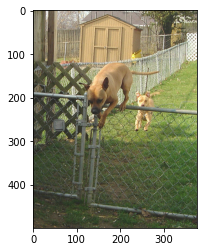

In [8]:
im = plt.imread("test/293879742_5fe0ffd894.jpg")
fig, ax = plt.subplots()
im = ax.imshow(im)
plt.show()

In [7]:
#Score: 0.24207828621261024
#Image: 270724499_107481c88f
import nltk
def convert(lst):
    return ([i for item in lst for i in item.split()])

hypothesis = ['a', 'brown', 'and', 'white', 'dog', 'is', 'running', 'through', 'a', 'field', 'of', 'grass', 'and', 'a', 'yellow', 'dog']
input = [
         "A dog with a blue ball running in a field",
         "a small tan dog running on the grass with a ball in his mouth"
         "Dog running towards camera with a ball in its mouth"
         "small dog running in the grass with a toy in its mouth"
         "The dog is running with a colorful ball",
]

reference = []
for i in input:
    reference.append(convert(i))

#there may be several references
BLEUscore = nltk.translate.bleu_score.sentence_bleu(reference, hypothesis)
print(BLEUscore)



0.24207828621261024


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [11]:
#Score: 0.28780044859364345
#Image: 293879742_5fe0ffd894
import nltk
def convert(lst):
    return ([i for item in lst for i in item.split()])

hypothesis = convert("a dog with a muzzle jumps in the air")
input = [
         "A brown dog is jumping over a fence and another dog is chasing it",
         "A brown dog jumps over a wire fence and another dog follows him",
         "A dog jumping off a fence and another dog on the grass in the background",
         "A dog jumping over a gate followed by another dog",
         "A small tan dog is jumping over a chain linked fence" 
]

reference = []
for i in input:
    reference.append(convert(i))

#there may be several references
BLEUscore = nltk.translate.bleu_score.sentence_bleu(reference, hypothesis)
print(BLEUscore)



0.28780044859364345


In [ ]:
!nvidia-smi

Wed Mar 23 16:03:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    32W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------